#Распознавание предметов одежды из набора данных fashion_mnist


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

##Импорт Библиотек

######Библиотека Keras содержит инструменты для работы с нейронными сетями

In [0]:
# загрузим набор данных, содержащий образцы одежды
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras import utils

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


##Подготовка данных для обучения сети

**Загружаем встроенный набор данных с одеждой**

In [0]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


**Создем массив с названиями одежды**

In [0]:
clothes = [
  "T-shirt/top",
  "Trouser",
  "Pullover",
  "Dress",
  "Coat",
  "Sandal",
  "Shirt",
  "Sneaker",
  "Bag",
  "Ankle boot"
]

**Преобразование размерности данных в наборе и нормализация данных**

In [0]:
X_train = X_train.reshape(60000, 28,28,1).astype('float32') / 255
X_test = X_test.reshape(10000, 28,28,1).astype('float32') / 255

**Преобразовываем метки в необходимое представление**

In [0]:
y_train = utils.to_categorical(Y_train, 10)
y_test = utils.to_categorical(Y_test, 10)

##Создание и обучение нейронной сети

**Создаем модель нейронной сети**

In [0]:
model = Sequential()

**Добавляем уровни сети**

In [0]:
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)        

**Зададим параметры, которые будут использоваться при обучении**

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01, momentum=0.9), metrics=["accuracy"])

**Обучаем модель**

In [0]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 815s 14ms/step - loss: 0.8071 - accuracy: 0.6920 - val_loss: 0.5138 - val_accuracy: 0.8035
Epoch 2/20
60000/60000 [==============================] - 821s 14ms/step - loss: 0.5039 - accuracy: 0.8098 - val_loss: 0.4093 - val_accuracy: 0.8506
Epoch 3/20
60000/60000 [==============================] - 817s 14ms/step - loss: 0.4299 - accuracy: 0.8422 - val_loss: 0.3532 - val_accuracy: 0.8720
Epoch 4/20
60000/60000 [==============================] - 826s 14ms/step - loss: 0.3852 - accuracy: 0.8578 - val_loss: 0.3270 - val_accuracy: 0.8771
Epoch 5/20
60000/60000 [==============================] - 823s 14ms/step - loss: 0.3568 - accuracy: 0.8682 - val_loss: 0.3182 - val_accuracy: 0.8847
Epoch 6/20
60000/60000 [==============================] - 821s 14ms/step - loss: 0.3375 - accuracy: 0.8760 - val_loss: 0.3012 - val_accuracy: 0.8904
Epoch 7/20
60000/60000 [==============================] 

##Оценим качество работы нейросети

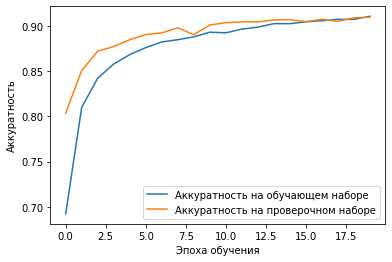

In [0]:
plt.plot(history.history['accuracy'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

##Сохраним модель в файл для дальнейшего использования

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
json = model.to_json()
with open('/content/gdrive/My Drive/neural_network/fashion_mnist.h5', 'w') as f:
  f.write(json)

## Используем сеть для распознавания одежды.

Предскажем значение для 488 объекта набора данных.

In [0]:
n_rec = 279

**Меняем размерность изображения и нормализуем его**

In [0]:
x = X_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [0]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [0]:
print(prediction)

[[2.0910262e-07 1.5189401e-07 1.9608403e-02 5.1716982e-09 9.8038703e-01
  1.7678824e-11 4.2410288e-06 4.7690598e-11 8.6408010e-09 4.5203410e-10]]


**Преобразуем результаты из формата one hot encoding**

In [0]:
prediction = np.argmax(prediction)
print("Prediction: " + clothes[prediction])

Предсказание: Coat


In [0]:
print("Correct answer: " + clothes[Y_test[n_rec]])

Правильный ответ: Coat
